<a href="https://colab.research.google.com/github/BiancaPedrosa/datascience/blob/master/Notebooks/Modulo2_Projeto_Tuberculose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONTEXTUALIZAÇÃO

INTRODUÇÃO


> A vacina contra a tuberculose (**BCG** - *Bacilo de Calmette-Guérin*) é elaborada a partir de uma bactéria atenuada de origem bovina (Mycobacterium bovis), que é semelhante ao microorganismo  causador da doença (Mycobacterium tuberculosis).
A BCG não impede a infecção e nem o desenvolvimento da tuberculose pulmonar, mas pode conferir certo grau de proteção para a meningite tuberculosa e para as formas disseminadas da doença.

No Brasil a BCG está no Calendário Básico de Vacinação e sua aplicação é feita por via intradérmica no primeiro mês de vida. 

O CVA não recomenda a aplicação desta vacina em adultos.(CVA, 2021)
Bloco com recuo





**OBJETIVO**

---


Este trabalho tem o objetivo de analisar se a  cobertura vacinal da vacina BCG no período de 2008 - 2019, tem relação com o IDH dos estados brasileiros, analisando se estados com IDH for maior tem  cobertura vacinal maior.




**DADOS**

---


1. Dados de imunização, casos de tuberculose e população do portal TABNET
2. Dados de IDH do Programa das Nações Unidas para o Desenvolvimento (PNUD)



# DADOS

In [ ]:
#IMPORTACAO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

<H2>LEITURA DOS DADOS</H2>

---





In [ ]:
#TABELA DE IMUNIZACOES
url="https://raw.githubusercontent.com/BiancaPedrosa/datascience/master/dados/A205836189_28_143_208.csv"

vacinas= pd.read_csv(url, encoding="ISO-8859-1", engine='python', 
                    sep=";",thousands=".", decimal=",", 
                    skiprows=3,skipfooter=20)

#vacinas.drop(columns="Total",axis=1, inplace=True)

vacinas.rename(columns={'Unidade da Federação':'uf'}, inplace=True)
vacinas['uf']=vacinas['uf'].str[3:]
vacinas=vacinas.set_index('uf')
vacinas.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
uf,,,,,,,,,,,
Rondônia,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,83.99
Acre,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,67.49
Amazonas,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,71.70
Roraima,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,76.17
Pará,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,68.21


In [ ]:
# dados IDHM do  Programa das Nações Unidas para o Desenvolvimento (PNUD)
from bs4 import BeautifulSoup
import requests
url= "https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-uf-2010.html"

html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
tabela = soup.find_all('table')[0]
dados_tabela = pd.read_html(str(tabela))
idh = pd.DataFrame(dados_tabela[0])

#renomear colunas
idh["uf"] = idh["Unidade da Federação"]
idh["idh"]= idh["IDHM 2010"]

#transformar os dados nos tipos corretos
idh["idh"] = idh["idh"].astype(float)/1000 

#selecionar colunas de interesse e fazer uf index
idh =  idh[["idh", "uf"]].set_index('uf')

idh.head()

,idh
uf,
Distrito Federal,0.824
São Paulo,0.783
Santa Catarina,0.774
Rio de Janeiro,0.761
Paraná,0.749


In [ ]:
#tabela de casos de tuberculose 2009-2018
url="https://raw.githubusercontent.com/BiancaPedrosa/datascience/master/dados/A181518189_28_143_208.csv"

casos= pd.read_csv(url, encoding="ISO-8859-1", engine='python', 
                    sep=";",thousands=".", decimal=",", 
                    skiprows=3,skipfooter=19)

casos.drop(columns="Total",axis=1, inplace=True)

casos.rename(columns={'UF de notificação':'uf'}, inplace=True)
casos['uf']=casos['uf'].str[3:]
casos=casos.set_index('uf')
casos.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
uf,,,,,,,,,,
Rondônia,680,572,685,692,711,686,665,775,780,678
Acre,364,347,392,409,406,462,361,450,484,483
Amazonas,2606,2764,2686,2842,3060,3143,3404,3259,3693,3803
Roraima,145,152,171,137,167,148,174,160,205,265
Pará,4106,4104,4334,4048,4119,3940,3991,4224,4511,4678


In [ ]:
#tabela de populacao 2009-2018
url="https://raw.githubusercontent.com/BiancaPedrosa/datascience/master/dados/populacao20092018.csv"

pop= pd.read_csv(url, encoding="ISO-8859-1", engine='python', 
                    sep=";",thousands=".", decimal=",", 
                    skiprows=3,skipfooter=12)

pop.rename(columns={'Unidade da Federação':'uf'}, inplace=True)
pop['uf']=pop['uf'].str[3:]
pop=pop.set_index('uf')
pop.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
uf,,,,,,,,,,
Rondônia,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589
Acre,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265
Amazonas,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611
Roraima,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568
Pará,7457119,7588078,7688593,7822205,7999729,8104880,8206923,8305359,8366628,8513497


<H2>TRANSFORMAÇÃO DOS DADOS</H2>

---



In [ ]:
#criando tabela dadospop com nro de casos de tuberculose/populacao
dadospop = pd.DataFrame()
#adicionando colunas dados[ano]=casos[ano]/pop[ano]
anos = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
for ano in anos:
  dadospop[ano] = casos[ano]/pop[ano]



In [ ]:
#ordenando pelos estados com mais casos
dadospop["Total"] = dadospop.sum(axis=1)
casos_ordenados = dadospop.sort_values("Total", ascending=False)
casos_ordenados = casos_ordenados.drop("Total", axis=1)

# TRANSFORMANDO A TABELA DADOS (NRO CASOS / POP) COM O MELT 
casos_melt= casos_ordenados.reset_index().melt(id_vars=['uf'],value_vars=casos_ordenados.columns)
casos_melt.columns = ["uf","ano","casos"]


In [ ]:
#ordenando as vacinas por estados mais vacinados
vacinas_ordenadas = vacinas.sort_values("Total", ascending=False)
vacinas_ordenadas = vacinas_ordenadas.drop("Total", axis=1)

# TRANSFORMANDO A TABELA VACINAS COM O MELT 
vacina_melt= vacinas_ordenadas.reset_index().melt(id_vars=['uf'],value_vars=vacinas_ordenadas.columns)
vacina_melt.columns = ["uf","ano","cv"]
vacina_melt['ano'].astype(int) 
vacina_melt.head()


,uf,ano,cv
0,Mato Grosso do Sul,2009,78.53
1,Rondônia,2009,83.87
2,Minas Gerais,2009,78.01
3,Tocantins,2009,81.54
4,Santa Catarina,2009,74.86


# VISUALIZAÇÃO

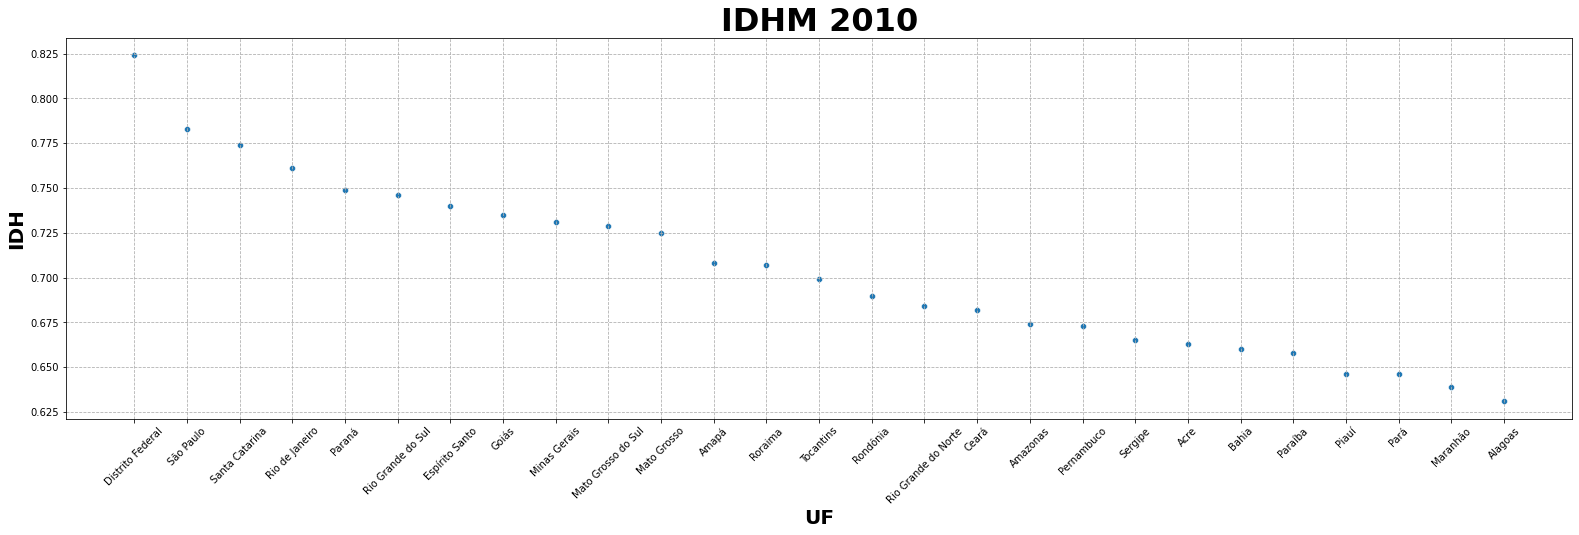

In [ ]:
#plotando o gráfico de idh

plt.figure(figsize=(27,7))
ax=sns.scatterplot(data=idh, x=idh.index, y="idh")
#configurando titulo principal e eixos do gráfico
plt.title('IDHM 2010', fontsize = 32, fontweight = 'bold')
ax.set_xlabel('UF', fontsize=20,fontweight = 'bold')
ax.set_ylabel('IDH', fontsize=20, fontweight = 'bold')
plt.grid(linestyle="--")
plt.xticks(rotation=45)
plt.show()



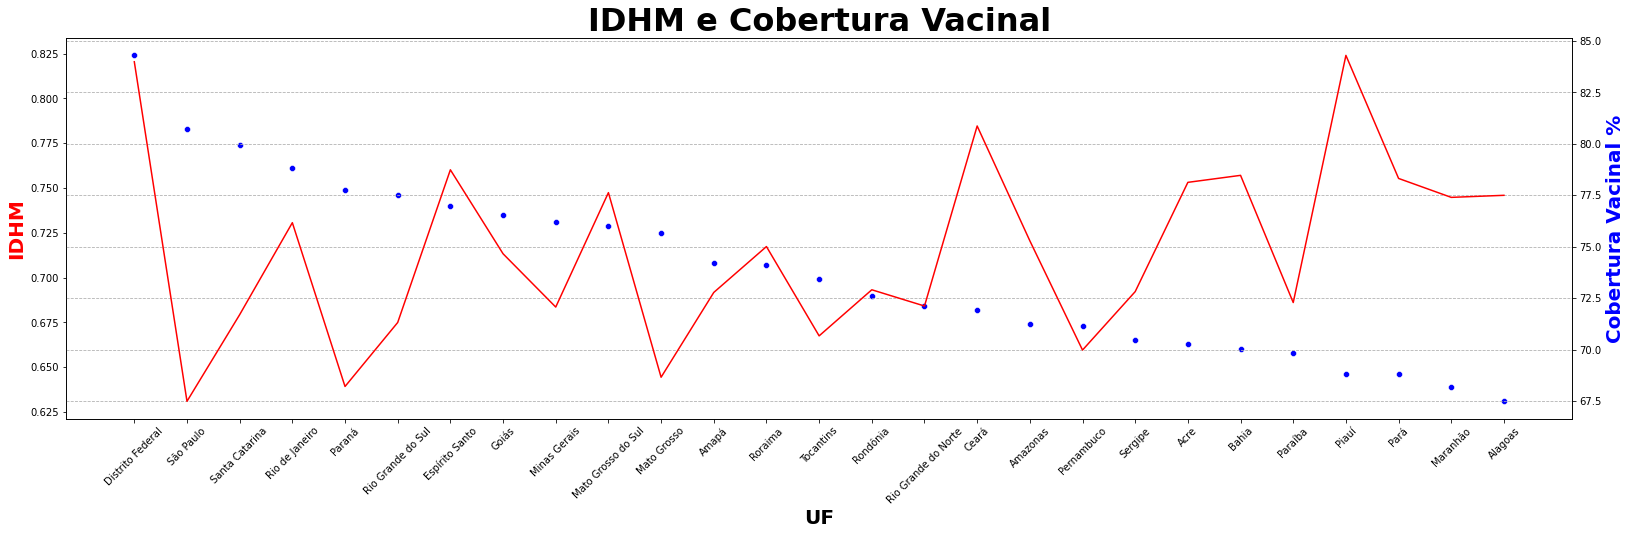

In [ ]:
#plotando IDH + Cobertura Vacinal

fig, ax1 = plt.subplots(figsize=(27,7))
ax2=ax1.twinx()
sns.lineplot(data=vacinas, x=vacinas.index,  color='r', ax = ax2, y="Total")
sns.scatterplot(data=idh, x=idh.index, ax = ax1,  color = 'b',y="idh")


#configurando titulo principal e eixos do gráfico
plt.title('IDHM e Cobertura Vacinal', fontsize = 32, fontweight = 'bold')

ax1.set_xlabel('UF', fontsize=20,fontweight = 'bold')
ax1.set_ylabel('IDHM', fontsize=20, fontweight = 'bold',color='r')
ax2.set_ylabel('Cobertura Vacinal %', fontsize=20, fontweight = 'bold',color='b')
ax1.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.grid(linestyle="--")

plt.show()


<h2>Cobertura Vacinal dos 3 estados com maior cobertura vacinal</h2>


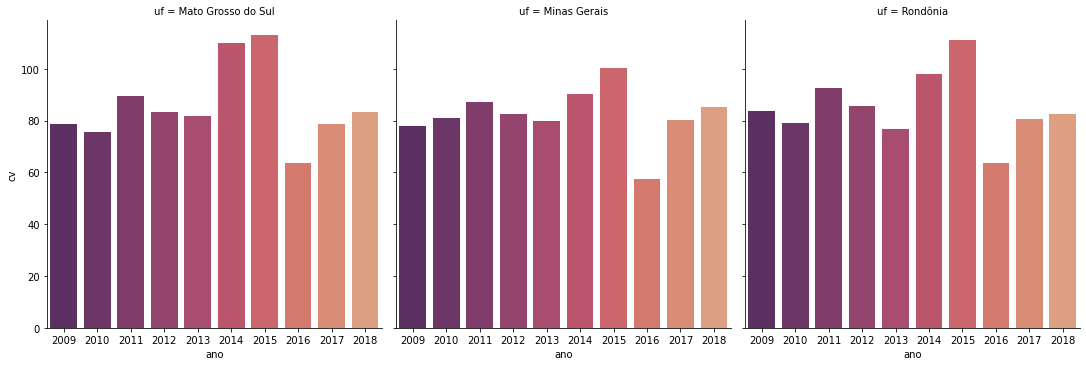

In [ ]:
#obter os tres estados com maior cobertura vacinal
estados = vacinas_ordenadas.index[:3]
maior_cv = vacina_melt.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
ax=sns.catplot(data=maior_cv, y="cv", x="ano", kind="bar", col="uf", palette=sns.color_palette("flare_r", 10))


<h2>Estados com maiores números de casos / habitante</h2>


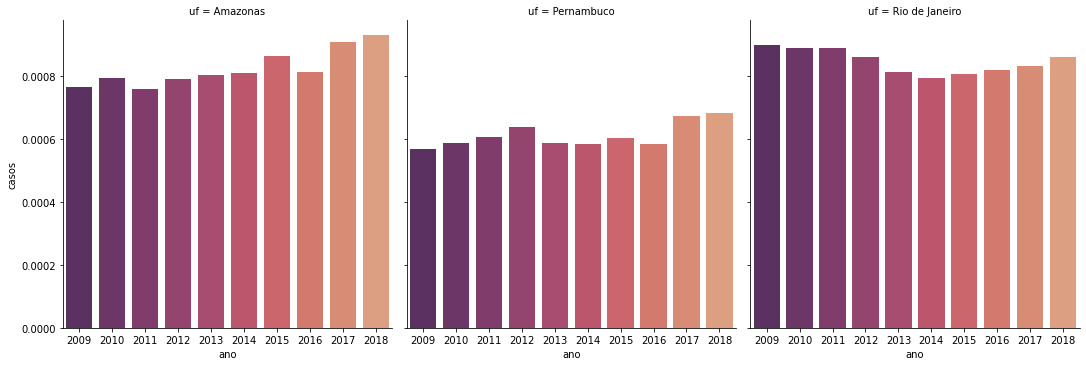

In [ ]:
#plotando o gráfico de casos de tuberculose
estados=casos_ordenados.index[:3]
maior_caso = casos_melt.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
ax=sns.catplot(data=maior_caso, y="casos", x="ano", kind="bar", col="uf", palette=sns.color_palette("flare_r", 10))

# CONCLUSÃO

Não há relacão entre IDH-M e Cobertura Vacinal. Os estados com maior IDH-M, que são Distrito Federal, São Paulo e Santa Catarina, não estão entre os estados com maior cobertura vacinal. Tampouco os estados com menor IDH_M (Pará, Maranhão e Alagoas) apresentam elevado nível de cobertura vacinal.

Os estados com maior cobertura vacinal são os estados de Minas Gerais, Rondônia e Mato Grosso do Sul.

Os dados de IDH são de 2010 e a maior parte dos dados são posteriores. Há que se investigar a evolução do IDH destes estados.

Nenhum dos estados com  elevados números de casos/habitante, apresentou expressiva elevação da taxa de cobertura vacinal ao longo dos anos.



# REFERENCIAS BIBLIOGRÁFICAS


1.   CVA. Centro de Vacinação de adultos. http://www.cva.ufrj.br/informacao/vacinas/tb-v.html. ACESSO EM 13/06/2021

2.   PNUD. Programa das Nações Unidas para o Desenvolvimento. https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-uf-2010.html. ACESSO EM 13/06/2021

3. DATASUS. Dados de cobertura vacinal, casos de tuberculose e população estimada.

4. Tuberculose e condições de vida: uma análise do estado do Rio de Janeiro, Brasil, 2000 a 2002. https://www.arca.fiocruz.br/handle/icict/4895. ACESSO em 19/06/2021




